# Projeto 2 - Extração e Análise de Métricas em Redes Sociais

Total: 0,5 Ponto

Para executar as análises, não esqueça de instalar as bibliotecas necessárias em requirements.txt

No terminal...
```bash
pip install -r requirements.txt
```
(Verifique se está na pasta do mesmo arquivo requirements.txt. Para descobrir, digite `dir` e veja se o arquivo aparece na lista)

In [28]:
aluno = input('Qual o nome do(s) aluno(s)?:   ')
print(f'Aluno(s) {aluno} registrado(s) com sucesso!')

Aluno(s) Erik Nonato Rolin registrado(s) com sucesso!


### 0) Preparação

Escolha uma base da pasta "bases" que se inicie com "tktk_" e termine com ".csv", e abra-a. Caso queira utilizar uma base própria, seja do Instagram ou TikTok, sinta-se à vontade. Atente que, caso a base escolhida não seja uma da pasta, você precisará tratá-la adequadamente. Abaixo, segue um código de exemplo para tratar uma base do Tiktok oriunda do Zeeschuimer. 

```python
colunas_desejadas = ['id', 'desc', 'challenges', 'createTime', 'video.duration', 'video.cover', 'author.id',
                'author.nickname', 'author.uniqueId','author.verified', 'music.title', 'authorStats.followingCount',
                'authorStats.followerCount', 'authorStats.heartCount', 'authorStats.videoCount',
                'authorStats.diggCount', 'authorStats.heart', 'statsV2.collectCount', 'statsV2.commentCount',
                'statsV2.diggCount', 'statsV2.playCount', 'statsV2.shareCount']
df = df[colunas_desejadas]
df['createdAt'] = df['createTime'].apply(lambda x: pd.Timestamp(x, unit='s'))

def preenche_url(item):
    return f"https://www.tiktok.com/@{item['author.uniqueId']}/video/{item['id']}"

df['url'] = df.apply(preenche_url, axis=1)
df['statsV2.diggCount'] = df['statsV2.diggCount'].astype(float)
df['statsV2.playCount'] = df['statsV2.playCount'].astype(float)
df['statsV2.shareCount'] = df['statsV2.shareCount'].astype(float)
df['statsV2.commentCount'] = df['statsV2.commentCount'].astype(float)
df['statsV2.collectCount'] = df['statsV2.collectCount'].astype(float)

def get_hashtags(lista):
    resultado = []
    try:
        for item in lista:
            resultado.append(item['title'])
        return resultado
    except:
        return resultado
  
df['hashtags'] = df['challenges'].apply(get_hashtags)
```

As bases do TikTok disponíveis na pasta "bases" são:

- tktk_base1.csv
- tktk_base2.csv
- tktk_base3.csv

### Lembrete: todos os gráficos gerados tem que ser LEGÍVEIS, ou seja, interpretáveis. Faça escolhas razoáveis para que os gráficos estejam de acordo. 

### 1) Abertura da base e estatísticas gerais (0,1)

Abra a base escolhida, exiba as primeiras 15 linhas, e mostre, para **cada variável numérica** da base, a contagem de linhas, a média, o mínimo, o percentil 25%, a mediana (percentil 50%), o percentil 75%, o máximo e o desvio padrão. (0,05)

Abaixo do código, faça um comentário interpretativo sobre o que você observou nos resultados. (0,05)

In [29]:
import pandas as pd

# Carregando o CSV
df = pd.read_csv('tktk_base1.csv')

# Esta GRANDE seção apenas esta limpando e organizando o dataset, obrigado pestana porque sem isso seria impossivel interpretar
colunas_desejadas = [
    'id', 'desc', 'challenges', 'createTime', 'video.duration', 'video.cover',
    'author.id', 'author.nickname', 'author.uniqueId', 'author.verified',
    'music.title', 'authorStats.followingCount', 'authorStats.followerCount',
    'authorStats.heartCount', 'authorStats.videoCount', 'authorStats.diggCount',
    'authorStats.heart', 'statsV2.collectCount', 'statsV2.commentCount',
    'statsV2.diggCount', 'statsV2.playCount', 'statsV2.shareCount'
]

df = df[colunas_desejadas]

df['createdAt'] = df['createTime'].apply(lambda x: pd.Timestamp(x, unit='s'))

def preenche_url(item):
    return f"https://www.tiktok.com/@{item['author.uniqueId']}/video/{item['id']}"

df['url'] = df.apply(preenche_url, axis=1)

metricas = [
    'statsV2.diggCount', 'statsV2.playCount', 'statsV2.shareCount',
    'statsV2.commentCount', 'statsV2.collectCount'
]

for coluna in metricas:
    df[coluna] = df[coluna].astype(float)

def get_hashtags(lista):
    resultado = []
    try:
        for item in lista:
            resultado.append(item['title'])
        return resultado
    except:
        return resultado

df['hashtags'] = df['challenges'].apply(get_hashtags)

# Uma vez que a magia aconteceu, vamos seguir com o trabalho

# Exibindo as primeiras 15 linhas da base
#print(df.head(15))

# Estatísticas descritivas completas para cada variável numérica
estatisticas = df.describe().T  # Transpõe para facilitar a leitura

# Adicionando a mediana manualmente
estatisticas['median'] = df[estatisticas.index].median()

# Exibindo as estatísticas
print(estatisticas[['count', 'mean', 'min', '25%', 'median', '75%', 'max', 'std']])

# O output desta célula só pode ser visualizado corretamente ao configurar o VSCode para exibir como scrabble element. Sem essa configuração, não é possível ver todos os elementos (sem o uso de extensões).



                            count                           mean  \
id                          603.0          7504219479959865344.0   
createTime                  603.0              1747212548.001658   
video.duration              603.0                      66.791045   
author.id                   603.0          7023058568212899840.0   
authorStats.followingCount  603.0                     304.547264   
authorStats.followerCount   603.0                  605755.344942   
authorStats.heartCount      603.0                16077002.870647   
authorStats.videoCount      603.0                     775.570481   
authorStats.diggCount       603.0                    7553.409619   
authorStats.heart           603.0                16077002.870647   
statsV2.collectCount        603.0                    5028.150912   
statsV2.commentCount        603.0                    1283.432836   
statsV2.diggCount           603.0                  106527.873964   
statsV2.playCount           603.0               

> Comentário: Variáveis como número de seguidores (authorStats.followerCount), curtidas (authorStats.heartCount) e visualizações (statsV2.playCount) apresentam médias muito maiores que as medianas, indicando a presença de outliers (criadores ou vídeos extremamente populares que distorcem a média). Vemos tambem a média de visualizações por vídeo é de aproximadamente 1,2 milhão, enquanto a mediana é de 236 mil, sugerindo que a maioria dos vídeos tem desempenho mais modesto, com alguns virais puxando a média para cima. O mesmo padrão se repete para curtidas, comentários e compartilhamentos. Essas observações ajudam a entender o comportamento geral dos criadores e vídeos na base analisada, além de orientar futuras análises sobre engajamento, popularidade e padrões de conteúdo. 

### 2) Qual a média e a mediana dos likes, comentários, compartilhamentos e plays, por autor? (0,1)

Calcule a média e a mediana dos likes, comentários, compartilhamentos e plays, por autor. (0,05)

Abaixo do código, faça um comentário interpretativo sobre o que você observou nos resultados. (0,05)

In [30]:
# Agrupando por autor e calculando média e mediana das métricas de engajamento
engajamento_por_autor = df.groupby('author.uniqueId')[[
    'statsV2.diggCount', 'statsV2.commentCount', 'statsV2.shareCount', 'statsV2.playCount'
]]

# Calculando média
media_por_autor = engajamento_por_autor.mean().rename(columns=lambda x: f'{x}_media')

# Calculando mediana
mediana_por_autor = engajamento_por_autor.median().rename(columns=lambda x: f'{x}_mediana')

# Unindo os resultados
resultado_engajamento = pd.concat([media_por_autor, mediana_por_autor], axis=1)

# Exibindo os primeiros autores como exemplo
#print(resultado_engajamento.head())

# Exibindo todos os resultados
print(resultado_engajamento)

# Para uma melhor visualização, recomendo usar a extensão "Data Wrangler" no VsCode, me ajuda demais na visualização e para as analises a seguir
# O output desta célula só pode ser visualizado corretamente ao configurar o VSCode para exibir como scrabble element. Sem essa configuração, não é possível ver todos os elementos (sem o uso de extensões).


                       statsV2.diggCount_media  statsV2.commentCount_media  \
author.uniqueId                                                              
.fulanadetownn                         71800.0                      1714.0   
.kamys_i                               43200.0                       323.0   
7marlinbastos                          19900.0                       883.0   
__fex7                                 40600.0                       920.0   
_bodysculptor                          11500.0                       323.0   
...                                        ...                         ...   
vozdoaltar                               293.0                         4.0   
wesleystx                              11000.0                       548.0   
ww.tiktok.compablocar                     65.0                         7.0   
yurizin2245                           116300.0                       510.0   
zoofficial                            493900.0                  

> Comentário: Alguns criadores apresentam números extremamente altos, como o perfil zoofficial, que possui média de 493.900 likes e 4.600.000 visualizações por vídeo, indicando forte presença e viralidade, entretanto há perfis com engajamento muito baixo, como ww.tiktok.compablocar, com média de apenas 65 likes e 3.115 visualizações, o que mostra uma grande disparidade entre os criadores. A proximidade entre média e mediana em muitos casos (ex: .fulanadetownn, __fex7) sugere que esses criadores têm engajamento consistente entre seus vídeos, sem grandes variações. Perfis com baixa mediana e média em todas as métricas, como vozdoaltar, podem representar contas menos ativas ou com alcance limitado. Essas observações ajudam a identificar padrões de engajamento e a distinguir criadores com conteúdo viral e consistente daqueles com baixa performance, o que pode ser útil para estudos sobre influência, alcance e estratégias de conteúdo na plataforma.

### 3) Qual a média da proporção, por usuário, de comentários por like? Ou seja, a cada like, quantos comentários cada usuário recebe? Organize por quem engaja mais (nesse caso, quem tem mais comentários por like) usando o método .sort_values(). (0,1) 

Calcule a proporção de comentários por like em cada vídeo, e depois, a média dessa proporção por autor. Organize por ordem decrescente a partir dessa métrica criada. (0,05)

Abaixo do código, faça um comentário interpretativo sobre o que você observou nos resultados. (0,05)

In [31]:
# Calculando a proporção de comentários por like em cada vídeo
df['comentarios_por_like'] = df['statsV2.commentCount'] / df['statsV2.diggCount']

# Agrupando por autor e calculando a média da proporção
proporcao_por_autor = df.groupby('author.uniqueId')['comentarios_por_like'].mean()

# Ordenando por quem engaja mais (mais comentários por like)
df_proporcao_ordenada = proporcao_por_autor.sort_values(ascending=False).reset_index()

# Renomeando a coluna para facilitar leitura
df_proporcao_ordenada.columns = ['author.uniqueId', 'media_comentarios_por_like']

# Exibindo o engajamento
print(df_proporcao_ordenada.to_string(index=False))


# Para uma melhor visualização, recomendo usar a extensão "Data Wrangler" no VsCode, me ajuda demais na visualização e para as analises a seguir
# O output desta célula só pode ser visualizado corretamente ao configurar o VSCode para exibir como scrabble element. Sem essa configuração, não é possível ver todos os elementos (sem o uso de extensões).


         author.uniqueId  media_comentarios_por_like
             pretinh2027                    0.500000
              felcortes4                    0.341463
           felca.xcortes                    0.309249
          hemersonsilva_                    0.299401
       matheusalcntarama                    0.275000
           livenpcvideos                    0.273577
          reserrvahytalo                    0.215452
               vddfamous                    0.213245
         felcadoscortes_                    0.198011
                felcafas                    0.187500
           gato.laranjaa                    0.187500
    hytalosantospessoal_                    0.173100
               tianowill                    0.159763
              _cortes520                    0.158602
                 rafaroy                    0.157437
     canaloficialdamilly                    0.153176
      felquinhaslivecuts                    0.151899
     hytalosantos_tiktok                    0.

> A partir de uma análise inicial do output exibido na célula acima, é possível observar que a maioria dos criadores apresenta uma proporção de comentários por like entre 0.0 e 0.2, indicando um engajamento moderado. No entanto, criadores como "pretinh2027", "felcortes4", "felcaxcortes", "hemersonsilva_", "matheusalcntarama", "livenpcvideos", "reserrvahytalo" e "vddfamous" se destacam como outliers, com proporções significativamente mais altas. Esses autores demonstram um engajamento qualitativo elevado, recebendo muitos comentários em relação ao número de likes em seus vídeos. Requer codigos mais profundos para analisar as estatísticas gerais da proporção de comentários por like (entretanto só de olho da para ver que a distribuição é assimétrica).

### 4) Crie um gráfico de barras que mostre a quantidade de vídeos por autor. (0,1)

Crie um gráfico de barras que mostre a quantidade de vídeos por autor, utilizando o seaborn ou matplotlib (0,05)

Abaixo do gráfico, faça um comentário interpretativo sobre o que você observou nos resultados. (0,05)

C:\Users\erikn\AppData\Local\Temp\ipykernel_28820\2881743519.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_autores, x='author.uniqueId', y='quantidade_videos', palette='viridis')


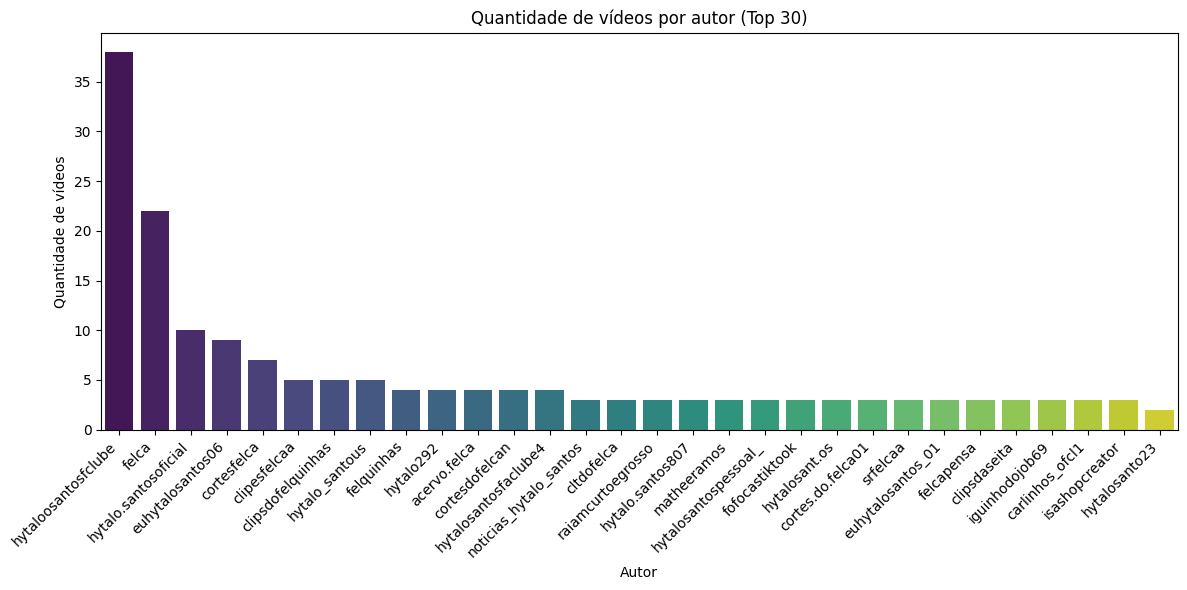

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar a quantidade de vídeos por autor
videos_por_autor = df['author.uniqueId'].value_counts().reset_index()
videos_por_autor.columns = ['author.uniqueId', 'quantidade_videos']

# Selecionar os 30 autores com mais vídeos para visualização
# Eu até tentei gerar um grafico com todos, mas ficou horrivel e não é necessario para uma analise
top_autores = videos_por_autor.head(30)

# Criar o gráfico de barras
plt.figure(figsize=(12,6))
sns.barplot(data=top_autores, x='author.uniqueId', y='quantidade_videos', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Quantidade de vídeos por autor (Top 30)')
plt.xlabel('Autor')
plt.ylabel('Quantidade de vídeos')
plt.tight_layout()
plt.show()


> Comentário: O gráfico revela que a maioria dos autores possui uma quantidade reduzida de vídeos na base (dentre 1 a 5 vídeos), com uma distribuição fortemente concentrada nos primeiros colocados. O autor "hyalosantosofclue" se destaca com 36 vídeos, seguido por "felca" com 14 vídeos, e "hyalosantosoficial" com 12 vídeos. A partir do quarto autor, os números caem rapidamente, indicando que a base é composta majoritariamente por criadores com baixa frequência de postagem. Essa concentração pode sugerir que alguns perfis foram monitorados com maior intensidade, ou que são centrais para o tema da base, como o escândalo envolvendo Hytalo e Felca. A presença de muitos autores com apenas 1 vídeo reforça a ideia de uma amostra ampla, mas com foco em poucos criadores mais ativos

### 5) Faça uma nuvem de palavras com as 100 hashtags mais utilizadas na base. (0,1)

Faça uma nuvem de palavras com as 100 hashtags mais utilizadas na base. (0,05)

Abaixo do gráfico, faça um comentário interpretativo sobre o que você observou nos resultados. (0,05)

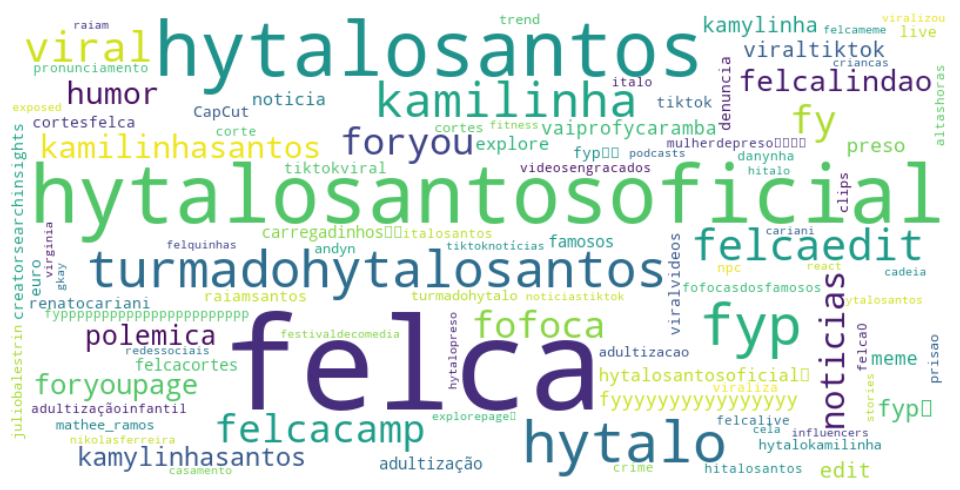

In [33]:
import pandas as pd
import ast
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Carregar o CSV
df = pd.read_csv("tktk_base1.csv")

# Função para extrair hashtags
def get_hashtags(challenge_str):
    try:
        challenges = ast.literal_eval(challenge_str)
        return [c['title'] for c in challenges if isinstance(c, dict) and 'title' in c]
    except Exception:
        return []

# Aplicar a função
df['hashtags'] = df['challenges'].apply(get_hashtags)

# Filtrar hashtags válidas
hashtags_validas = df['hashtags'].dropna().apply(lambda x: isinstance(x, list) and len(x) > 0)
todas_hashtags = [hashtag for lista in df.loc[hashtags_validas, 'hashtags'] for hashtag in lista]

# Contar frequência
frequencia = pd.Series(todas_hashtags).value_counts()
top_100 = frequencia.head(100)

# Gerar wordcloud
if not top_100.empty:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_100)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Não há hashtags suficientes para gerar a nuvem de palavras.")



> Comentário: Este wordcloud gerado demonstra não só a temática do dataset (o escândalo da lei Felca e Hytalo Santos), mas também demonstra a centralidade dessas figuras públicas na construção de narrativas virais dentro do TikTok. A predominância de nomes próprios como “felca”, “hytalosantosoficial” e “kamilinhasantos” revela que o conteúdo está fortemente vinculado a personagens específicos, enquanto termos como “viral”, “noticias” e “fofoca” indicam que os vídeos abordam temas de interesse coletivo, com forte apelo emocional e potencial de engajamento. A presença de hashtags como “#foryou” e “#fy” reforça a estratégia de alcance e distribuição típica da plataforma, evidenciando que o conteúdo não apenas circula, mas é moldado para performar bem dentro do algoritmo.

# Extra: 0,1

Identifique o tema do dataset com base nas análises anteriores. 

# Resposta: O tema deste Dataset (tktk_base1.csv) se trata sobre o escandalo do Hytalo Santos e o criador de conteudo Felca.